### Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.



### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").



### Dataset:

he dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone

In [1]:
!pip install contractions

### Import the libraries

In [2]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
import seaborn as sns    

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/realdulos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/realdulos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/realdulos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load dataset

In [3]:
import pandas as pd
data=pd.read_csv('Tweets.csv')

### Print the shape of data

In [4]:
data.shape                                               # print shape of data.

(14640, 15)

In [5]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Data description

In [6]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Exploratory data analysis (EDA) 

### Missing Value analysis

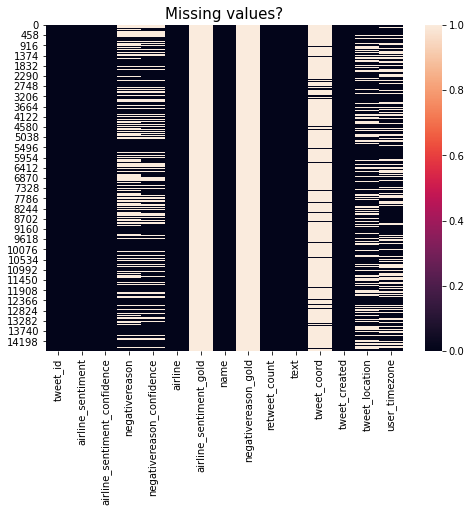

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- Based on the above plot, we can say as there are many of missing values in "negativereason","negativereason_confidence","tweet_location" and "user_timezone" columns.
- "airline_sentiment_gold" and "negativereason_gold" columns have got all missing values.

In [9]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

 * "airline_sentiment_gold" and "negativereason_gold" columns have got all values as nulls, tweet_coord has too many null values.

The below function, will give these output in Dataframe

- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [10]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.8,14608,99.8,object
airline_sentiment_gold,0,14600,99.7,14600,99.7,object
tweet_coord,0,13621,93.0,13621,93.0,object
negativereason,0,5462,37.3,5462,37.3,object
user_timezone,0,4820,32.9,4820,32.9,object
tweet_location,0,4733,32.3,4733,32.3,object
negativereason_confidence,1344,4118,28.1,5462,37.3,float64


* negativereason_gold column has got 99.8% missing value
* airline_sentiment_gold column has got 99.7% missing values
* tweet_coord column has got 93.0% missing value

In [11]:
#Drop the column which have got too many missing values or does not relevent information
data.drop(['tweet_id','negativereason_gold','airline_sentiment_gold','tweet_coord'],axis=1,inplace=True)
data.shape

(14640, 11)

In [12]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


#### Plot the distribution of all tweets among each airline 

<AxesSubplot:xlabel='airline', ylabel='count'>

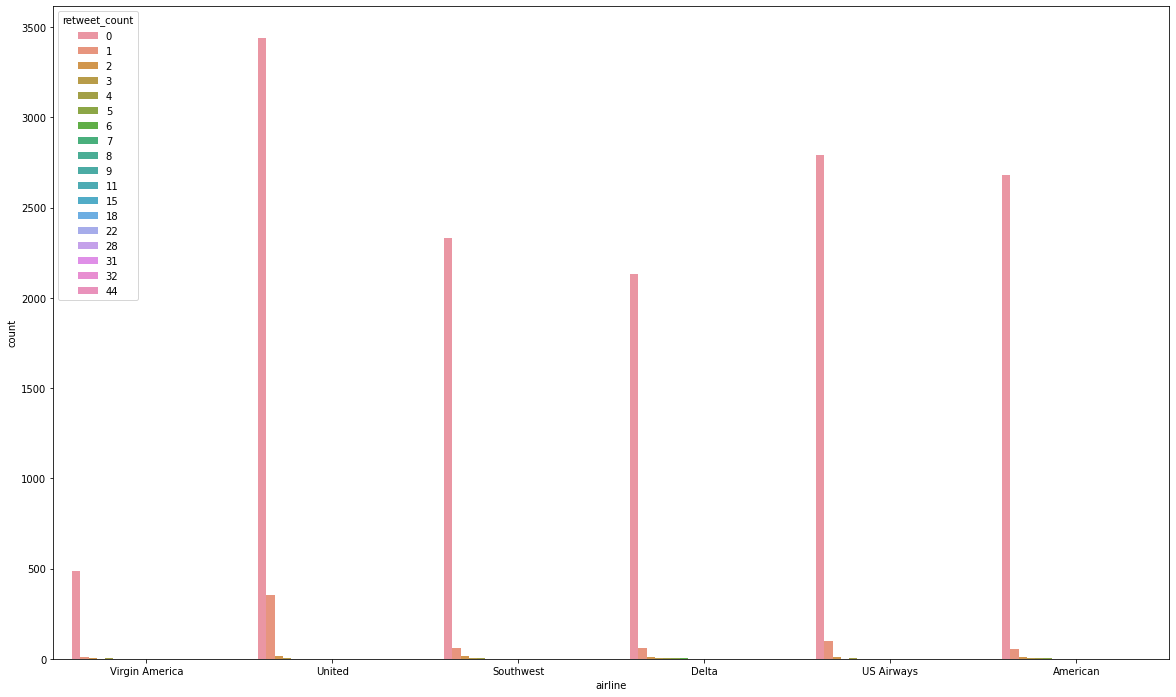

In [13]:
# Sentiment for each airline
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.countplot(x='airline', hue = 'retweet_count',data = data)

- **United Airlines had the most re-tweet numbers.**

#### Plot the distribution of sentiment across all the tweets. 

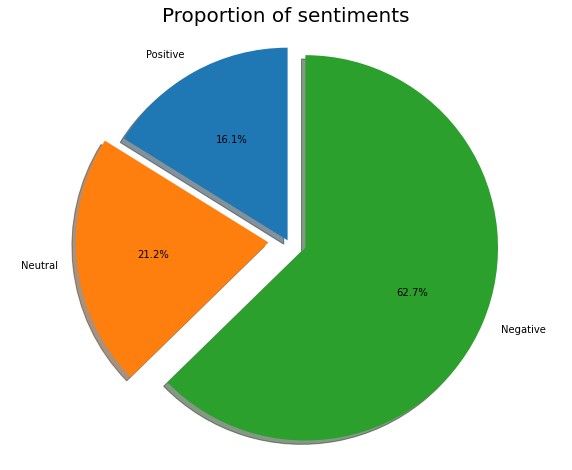

In [14]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [data.airline_sentiment[data['airline_sentiment']=='positive'].count(), data.airline_sentiment[data['airline_sentiment']=='neutral'].count(), data.airline_sentiment[data['airline_sentiment']=='negative'].count()]
explode = (0, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of sentiments", size = 20)
plt.show()

- **Negative sentiment accounted for about 62%, followed by neutral sentiment with 21% and positive sentiment with only 16%.**

#### Plot the distribution of Sentiment of tweets for each airline

<AxesSubplot:xlabel='airline', ylabel='count'>

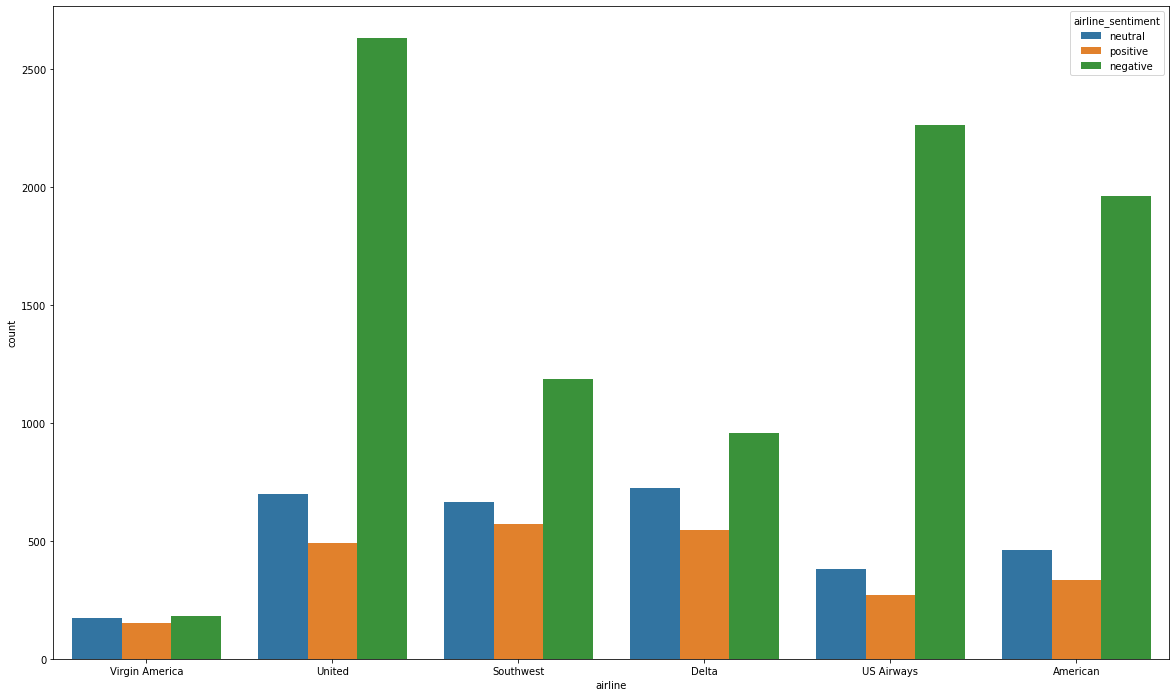

In [15]:
# Sentiment for each airline
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.countplot(x='airline', hue = 'airline_sentiment',data = data)

- **The airline with the most negative sentiment was united, followed by US Airway and American.**
- **The airlines with the most positive sentiment were Southwest, Delta and United, with Virgin America the least.**
- **Virgin America received the least sentiment.**

#### Plot the distribution of all the negative reasons. 

<AxesSubplot:xlabel='negativereason', ylabel='count'>

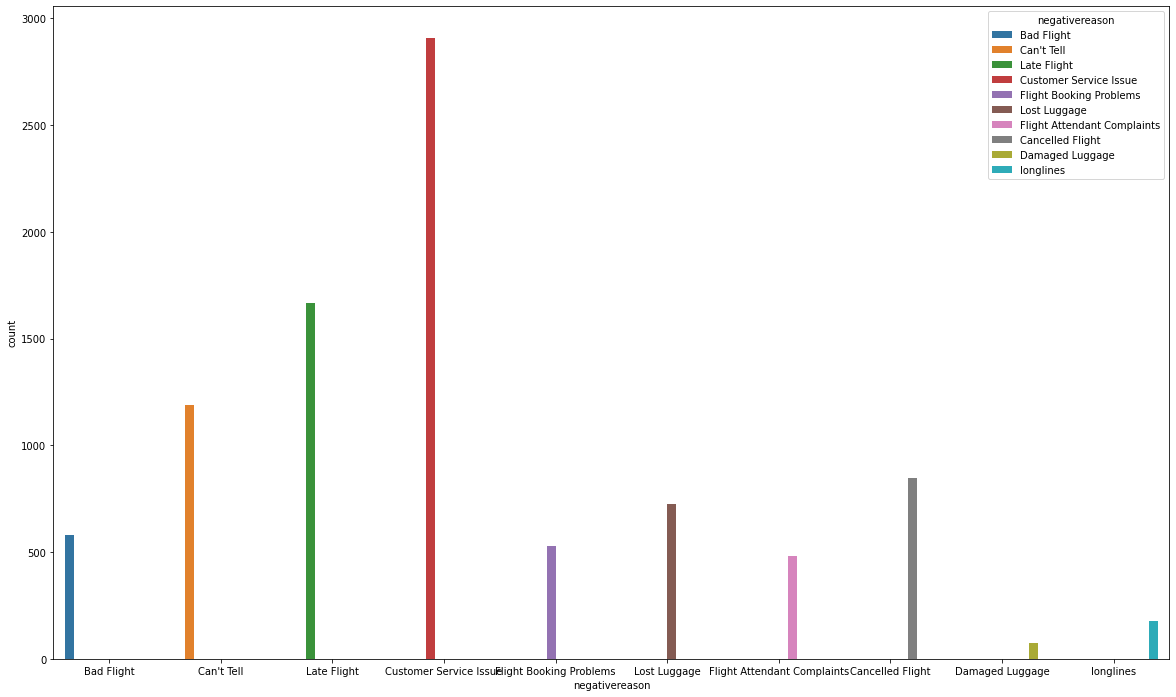

In [16]:
# Distributuion of all the negative reasons.
fig, axarr = plt.subplots(1, 1, figsize=(20, 12))
sns.countplot(x='negativereason', hue = 'negativereason',data = data)

- **Among the negative reasons, the biggest cause was customer service, followed by departure delay and flight cancellation.**

#### Extract year, month, date & hour from "tweet_created" column

In [17]:
year=[]
month=[]
date=[]
hour=[]
for x in data['tweet_created']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

data['year']=year
data['month']=month
data['dates']=date
data['hour']=hour
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,year,month,dates,hour
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015,2,24,11
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015,2,24,11
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015,2,24,11
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015,2,24,11
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015,2,24,11


In [18]:
data.describe()

,airline_sentiment_confidence,negativereason_confidence,retweet_count,year,month,dates,hour
count,14640.000000,10522.000000,14640.000000,14640.0,14640.0,14640.000000,14640.000000
mean,0.900169,0.638298,0.082650,2015.0,2.0,20.947473,12.319945
std,0.162830,0.330440,0.745778,0.0,0.0,2.170646,5.306285
min,0.335000,0.000000,0.000000,2015.0,2.0,16.000000,0.000000
25%,0.692300,0.360600,0.000000,2015.0,2.0,19.000000,8.000000
50%,1.000000,0.670600,0.000000,2015.0,2.0,22.000000,12.000000
75%,1.000000,1.000000,0.000000,2015.0,2.0,23.000000,17.000000
max,1.000000,1.000000,44.000000,2015.0,2.0,24.000000,23.000000


Text(0.5, 0.98, 'Characters in message')

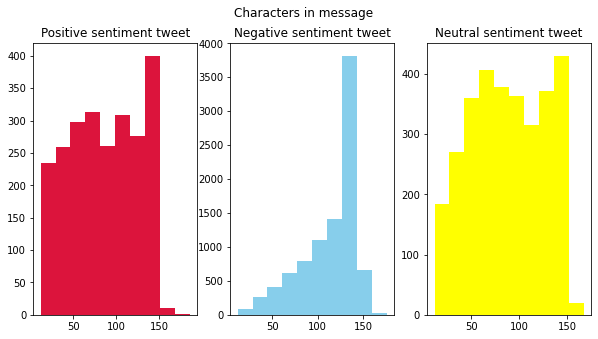

In [19]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='yellow')
ax3.set_title('Neutral sentiment tweet')
fig.suptitle('Characters in message')

- Greatest number of characters is in the neutral sentiment tweets and smallest number in the negative ones.

Text(0.5, 0.98, 'Words in a tweet')

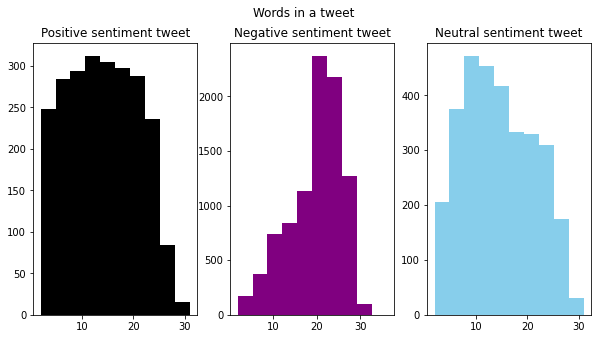

In [20]:
#Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='skyblue')
ax3.set_title('Neutral sentiment tweet')
fig.suptitle('Words in a tweet')

- **There is no substantial difference between positive and neutral sentiment tweet with respect to the length of words in the tweet.**

#### Most active hour on twitter

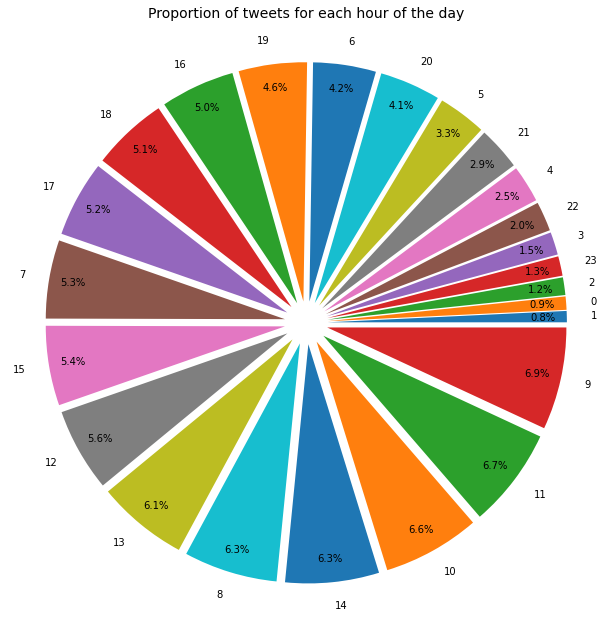

In [21]:
#Using matplotlib
Category=data['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

- **People tweets between 08:00 to 13:00 hour of the day at the most.**
- **People tweets are less at the morning & late evening hour of the day.**

#### Number of tweet per Day

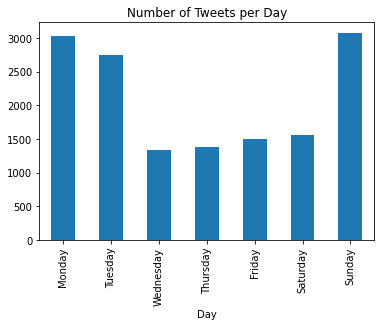

In [22]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']) # To make sure that pandas understands it's a date
plt.figsize = (16,10)

plt.title("Number of Tweets per Day")
tweet_cpt = data["tweet_created"].groupby(data["tweet_created"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")    #Assigning each day of the week as index
plt.xlabel("Day")
plt.show()

- **People tweeted more from Sunday to Tuesday.**

### Drop all other columns except “text” and “airline_sentiment”.

In [23]:
data = data.loc[:, ['airline_sentiment','text']]

In [24]:
data.isnull().sum(axis=0)                                # Check for NULL values.

airline_sentiment    0
text                 0
dtype: int64

In [25]:
data=data.dropna()                                     # Dropping off missing values
data.columns                                           # Print the column of the dataframe

Index(['airline_sentiment', 'text'], dtype='object')

In [26]:
data.shape                                            #Shape of the data

(14640, 2)

In [27]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


### **Text Pre-processing:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used the **NLTK library to tokenize words, remove stopwords and lemmatize the remaining words**

In [28]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [29]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [30]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [31]:
# Removal of @ using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"@","", data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet
data.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said.
1,positive,VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,VirginAmerica and it is a really big bad thing about it


In [32]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [33]:
data.head()                                                                    # Look at how tokenized data looks.

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said, .]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [34]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#        "VirginAmerica", "United", "Southwest","Delta","American", "USAirways"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [35]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


In [36]:
# Removal of airlines using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"virginamerica", "",data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet

In [37]:
data.head()

,airline_sentiment,text
0,neutral,dhepburn say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


In [38]:
# Removal of airlines using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"americanair", "",data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet

,airline_sentiment,text
14635,positive,thank get different flight chicago
14636,negative,leave minutes late flight warn communication minutes late flight call shitty customer svc
14637,neutral,please bring american airlines blackberry
14638,negative,money change flight not answer phone suggestions make commitment
14639,neutral,ppl need know many seat next flight plz put us standby people next flight


In [39]:
# Removal of airlines using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"delta", "",data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet

In [40]:
# Removal of airlines using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"united", "",data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet

In [41]:
# Removal of airlines using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"southwest", "",data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet

In [42]:
# Removal of airlines using Regular Expression.
for i, row in data.iterrows():
    clean_tweet = re.sub(r"usairways", "",data.at[i, 'text'])
    data.at[i,'text'] = clean_tweet

### **Word Cloud based on Summary and Score**

In [43]:

data['Summary'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Summary'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

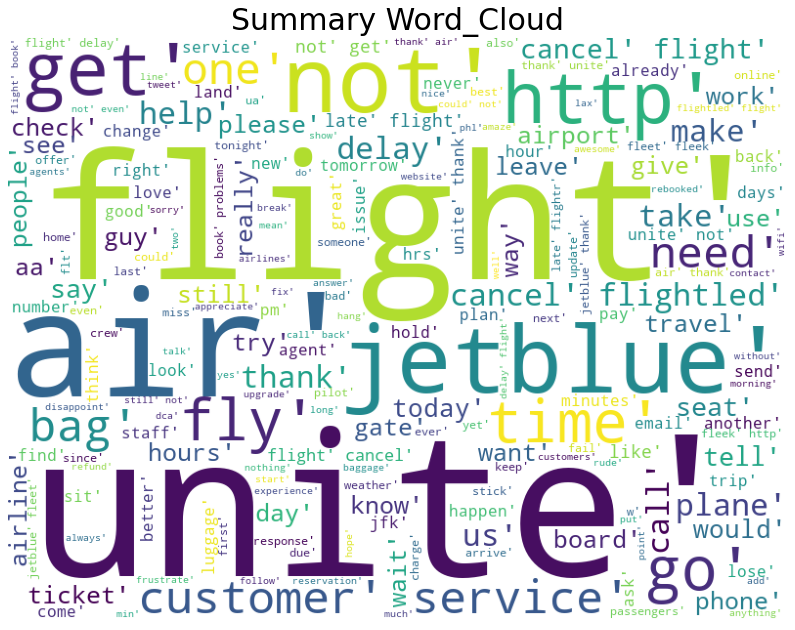

In [44]:
show_wordcloud(data,'Summary Word_Cloud')


- We can see the most frequent words choosen by consumers to express their sentiment for the products

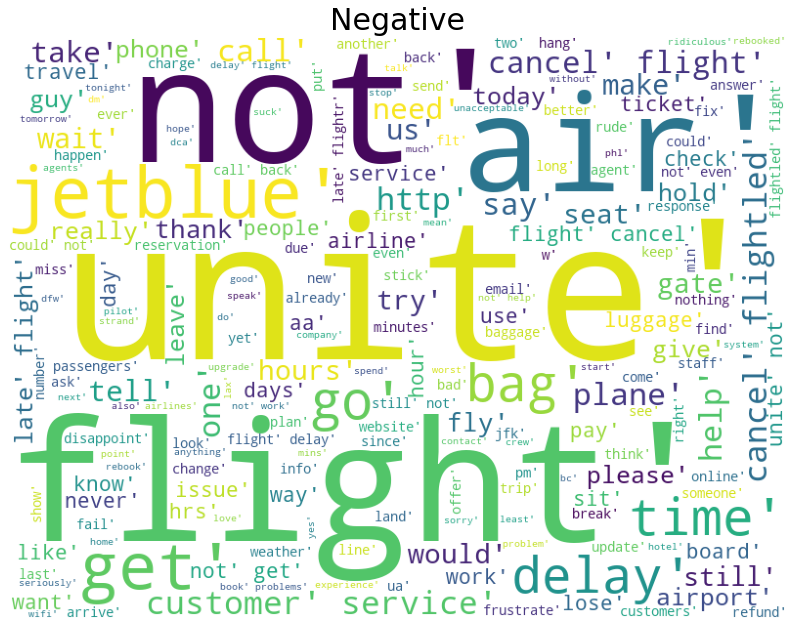

In [45]:
show_wordcloud(data[data.airline_sentiment == "negative"], title = "Negative")

- Consumers are complaining delay, cancel and late

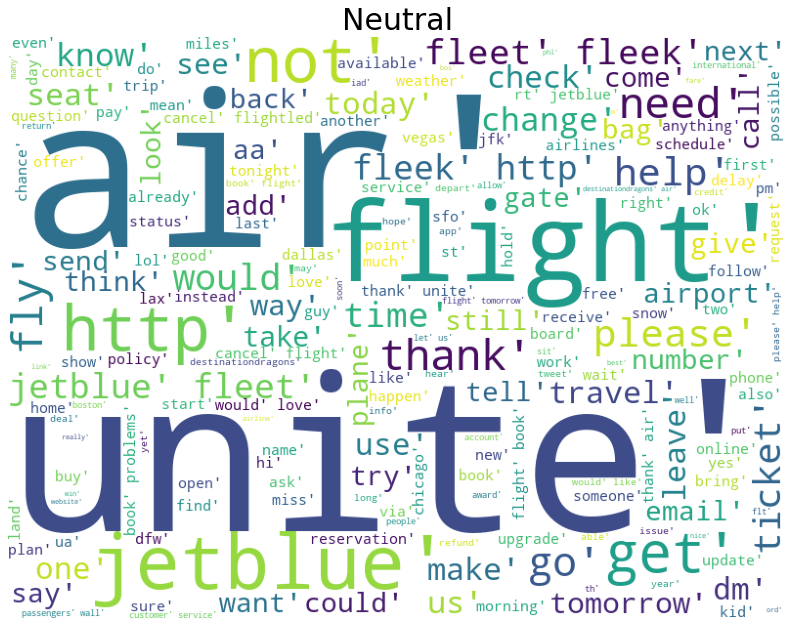

In [46]:
show_wordcloud(data[data.airline_sentiment == "neutral"], title = "Neutral")

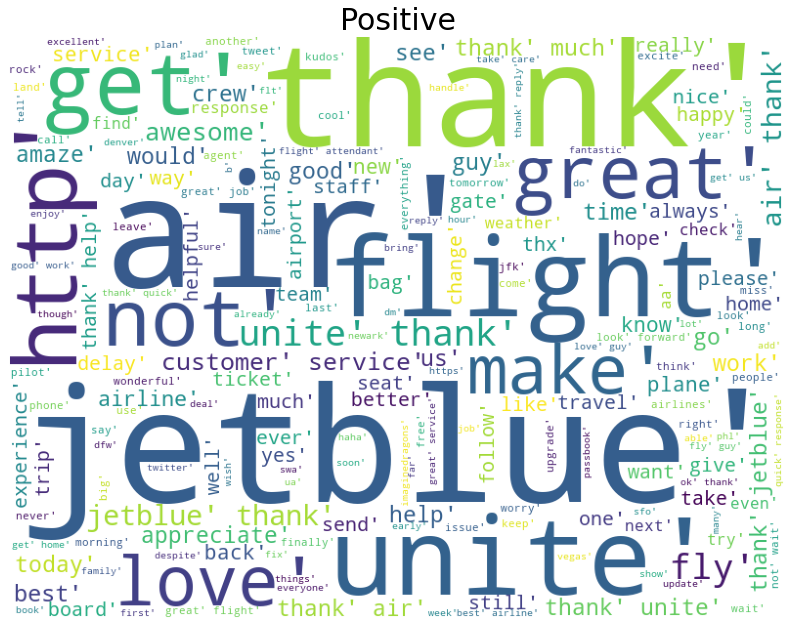

In [47]:
show_wordcloud(data[data.airline_sentiment == "positive"], title = "Positive")

- Customers expressed their experience positively by using the words thank, best, appreciate and love.

### **Building the model based on CountVectorizer and Random Forest**

In [48]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [49]:
data_features.shape

(14640, 2000)

In [50]:
labels = data['airline_sentiment']
#labels = labels.astype('int')

In [51]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [52]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7243169398907103


### **Optimizing the parameter: Number of trees in the random forest model(n_estimators)**

In [53]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [54]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

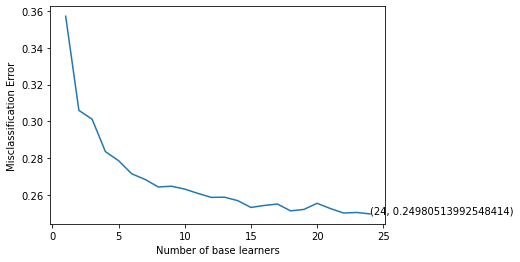

In [55]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [56]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7759562841530054

In [57]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2547  205   62]
 [ 368  438   78]
 [ 163  108  423]]
0.7759562841530054


<AxesSubplot:>

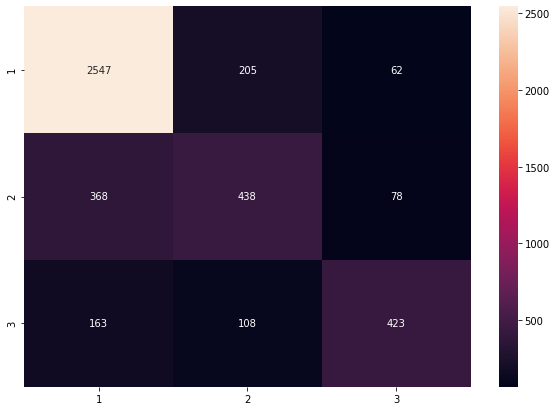

In [58]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

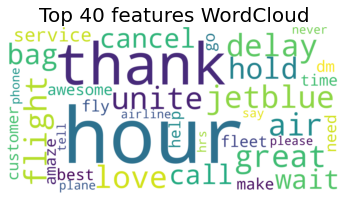

In [59]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **Term Frequency(TF) - Inverse Document Frequency(IDF)**

In [60]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [61]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [62]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7137295081967213


In [63]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

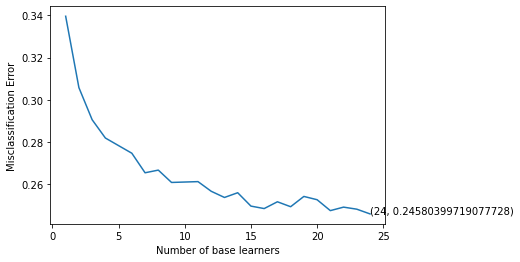

In [64]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [65]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7727686703096539

In [66]:
result = clf.predict(X_test)

[[2620  144   50]
 [ 429  392   63]
 [ 210  102  382]]
0.7727686703096539


<AxesSubplot:>

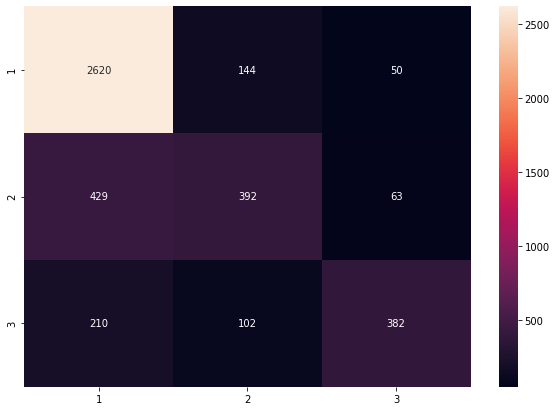

In [67]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

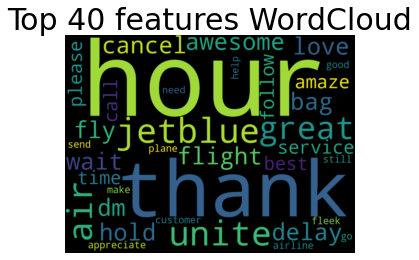

In [68]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

## XGBoost Classifier

In [76]:
from xgboost import XGBClassifier
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train,y_train)
xgb_classifier.score(X_test, y_test)

/home/realdulos/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:52:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7916666666666666

[[2625  135   54]
 [ 411  410   63]
 [ 172   80  442]]
0.7916666666666666


<AxesSubplot:>

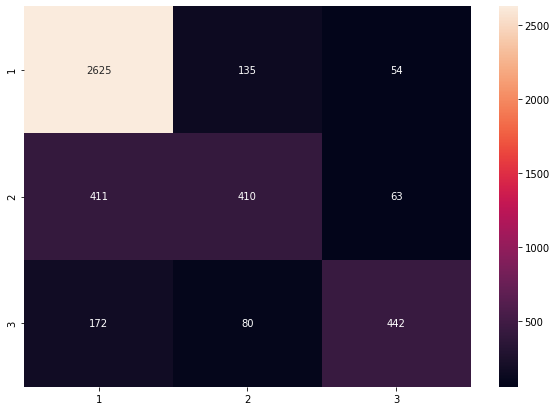

In [79]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  xgb_classifier.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

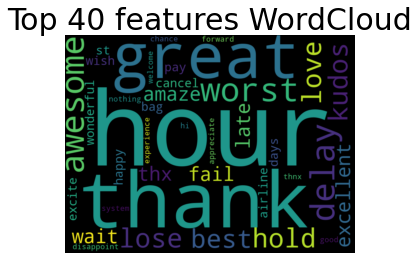

In [80]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=xgb_classifier.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

- We can see more improved Top 40 features WordCloud comapred to RandomForest

### **Summary**:

- We used a dataset which has **tweets in text format and their three sentiment states(positive, neutral & negative).**
- The goal was to **build a model for text-classifictation**.
- We **pre-processed the data** using various techniques and libraries.
- We **created a Word Cloud plot** based on summary.
- The **pre-processed data is converted to numbers (vectorized)**, so that we can feed the data into the model.
- We trained the model and optimized the parameter, which **led to an increase the overall accuracy.**
- After building the classification model, we **predicted the results for the test data.**
- 2 classifiers(**RandomForest, XGBoost**) were used for text-classifictation. **XGB model** performed the best result.
- We saw that using the above techniques, our model performed well in perspective of how text classification models perform.